<a href="https://colab.research.google.com/github/sajjkavinda/cervical-spine-fracture-detection/blob/main/cervical_spine_fracture_detection_enhanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y gdcm python-gdcm pydicom pylibjpeg pylibjpeg-libjpeg pylibjpeg-openjpeg --quiet
!pip install pydicom pylibjpeg pylibjpeg-libjpeg pylibjpeg-openjpeg --quiet
!pip install opencv-python matplotlib tqdm --quiet
!pip install pandas scikit-learn matplotlib tqdm --quiet
!pip install torch torchvision torchaudio --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.2 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!unzip -q "/content/drive/MyDrive/Dataset-RSNA/rsna_subset.zip" -d "/content/rsna_subset" && echo "Unzip completed successfully!"

Unzip completed successfully!


In [4]:
import os
import cv2
import pydicom
from tqdm import tqdm

# Paths
DICOM_ROOT = "/content/rsna_subset/rsna_subset_images"
IMAGE_ROOT = "/content/rsna_png_images"
os.makedirs(IMAGE_ROOT, exist_ok=True)

# Convert DICOM to PNG
for study_uid in tqdm(os.listdir(DICOM_ROOT)):
    study_path = os.path.join(DICOM_ROOT, study_uid)
    if not os.path.isdir(study_path):
        continue
    png_folder = os.path.join(IMAGE_ROOT, study_uid)
    os.makedirs(png_folder, exist_ok=True)

    dicom_files = [f for f in os.listdir(study_path) if f.lower().endswith(".dcm")]
    if not dicom_files:
        os.rmdir(png_folder)
        continue

    # Take up to 3 middle slices
    dicom_files = sorted(dicom_files)
    mid = len(dicom_files) // 2
    start = max(0, mid-1)
    selected = dicom_files[start:start+3]

    for f in selected:
        dicom_path = os.path.join(study_path, f)
        png_path = os.path.join(png_folder, f.replace(".dcm",".png"))
        try:
            dcm = pydicom.dcmread(dicom_path)
            img = dcm.pixel_array
            img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
            cv2.imwrite(png_path, img)
        except Exception as e:
            print(f"Failed {dicom_path}: {e}")

print("All DICOMs converted. Only folders with PNGs remain.")

# Verify dataset
studies_with_images = [d for d in os.listdir(IMAGE_ROOT) if os.path.isdir(os.path.join(IMAGE_ROOT, d)) and len(os.listdir(os.path.join(IMAGE_ROOT, d)))>0]
print("Studies with images:", len(studies_with_images))


100%|██████████| 800/800 [00:22<00:00, 35.19it/s]

All DICOMs converted. Only folders with PNGs remain.
Studies with images: 800


Train studies: 576 Val studies: 144 Test studies: 80
Samples -> Train: 1728 Val: 432 Test: 240

==== Training simple_cnn ====


  0%|          | 0/108 [00:00<?, ?it/s]

simple_cnn Epoch 1/10 - Train Acc: 51.62%, Val Acc: 53.01%, Val AUC: 0.577


  0%|          | 0/108 [00:00<?, ?it/s]

simple_cnn Epoch 2/10 - Train Acc: 55.15%, Val Acc: 54.40%, Val AUC: 0.539


  0%|          | 0/108 [00:00<?, ?it/s]

simple_cnn Epoch 3/10 - Train Acc: 58.68%, Val Acc: 58.10%, Val AUC: 0.539


  0%|          | 0/108 [00:00<?, ?it/s]

simple_cnn Epoch 4/10 - Train Acc: 60.36%, Val Acc: 53.70%, Val AUC: 0.535


  0%|          | 0/108 [00:00<?, ?it/s]

simple_cnn Epoch 5/10 - Train Acc: 62.04%, Val Acc: 50.00%, Val AUC: 0.530


  0%|          | 0/108 [00:00<?, ?it/s]

simple_cnn Epoch 6/10 - Train Acc: 63.48%, Val Acc: 51.16%, Val AUC: 0.540


  0%|          | 0/108 [00:00<?, ?it/s]

simple_cnn Epoch 7/10 - Train Acc: 65.74%, Val Acc: 54.17%, Val AUC: 0.546


  0%|          | 0/108 [00:00<?, ?it/s]

simple_cnn Epoch 8/10 - Train Acc: 67.65%, Val Acc: 52.55%, Val AUC: 0.552


  0%|          | 0/108 [00:00<?, ?it/s]

simple_cnn Epoch 9/10 - Train Acc: 67.30%, Val Acc: 53.47%, Val AUC: 0.560


  0%|          | 0/108 [00:00<?, ?it/s]

simple_cnn Epoch 10/10 - Train Acc: 66.38%, Val Acc: 55.09%, Val AUC: 0.565

==== Training resnet18 ====
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 131MB/s]


  0%|          | 0/108 [00:00<?, ?it/s]

resnet18 Epoch 1/10 - Train Acc: 66.20%, Val Acc: 56.48%, Val AUC: 0.578


  0%|          | 0/108 [00:00<?, ?it/s]

resnet18 Epoch 2/10 - Train Acc: 81.89%, Val Acc: 53.01%, Val AUC: 0.533


  0%|          | 0/108 [00:00<?, ?it/s]

resnet18 Epoch 3/10 - Train Acc: 89.29%, Val Acc: 52.55%, Val AUC: 0.513


  0%|          | 0/108 [00:00<?, ?it/s]

resnet18 Epoch 4/10 - Train Acc: 91.96%, Val Acc: 56.71%, Val AUC: 0.559


  0%|          | 0/108 [00:00<?, ?it/s]

resnet18 Epoch 5/10 - Train Acc: 96.12%, Val Acc: 52.08%, Val AUC: 0.544


  0%|          | 0/108 [00:00<?, ?it/s]

resnet18 Epoch 6/10 - Train Acc: 97.11%, Val Acc: 50.23%, Val AUC: 0.562


  0%|          | 0/108 [00:00<?, ?it/s]

resnet18 Epoch 7/10 - Train Acc: 97.11%, Val Acc: 53.94%, Val AUC: 0.566


  0%|          | 0/108 [00:00<?, ?it/s]

resnet18 Epoch 8/10 - Train Acc: 99.25%, Val Acc: 54.17%, Val AUC: 0.581


  0%|          | 0/108 [00:00<?, ?it/s]

resnet18 Epoch 9/10 - Train Acc: 98.67%, Val Acc: 53.24%, Val AUC: 0.568


  0%|          | 0/108 [00:00<?, ?it/s]

resnet18 Epoch 10/10 - Train Acc: 99.13%, Val Acc: 52.78%, Val AUC: 0.557


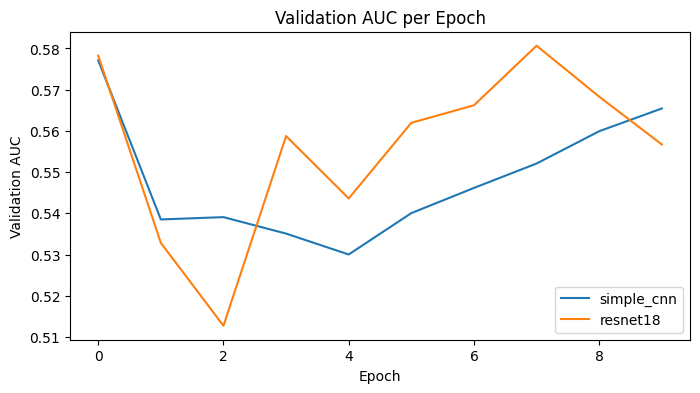

        model    acc   prec    rec     f1    auc
1    resnet18  0.542  0.571  0.484  0.524  0.581
0  simple_cnn  0.530  0.526  0.991  0.687  0.577


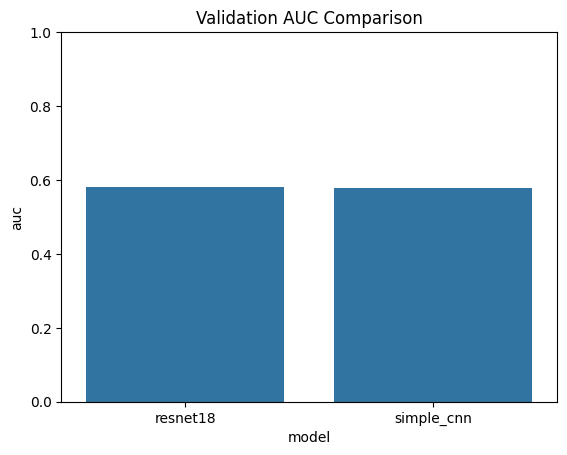


Evaluating simple_cnn on Test Set...

Evaluating resnet18 on Test Set...

Test Set Performance:
        model    acc   prec    rec     f1    auc
0  simple_cnn  0.533  0.529  1.000  0.692  0.637
1    resnet18  0.562  0.602  0.492  0.541  0.623


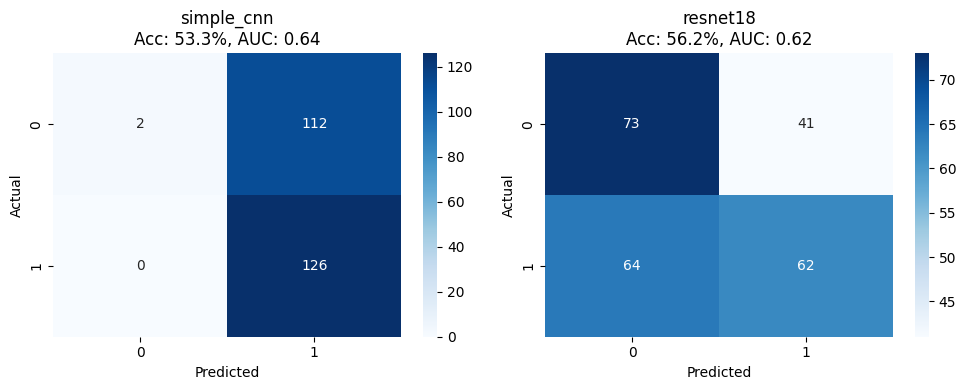

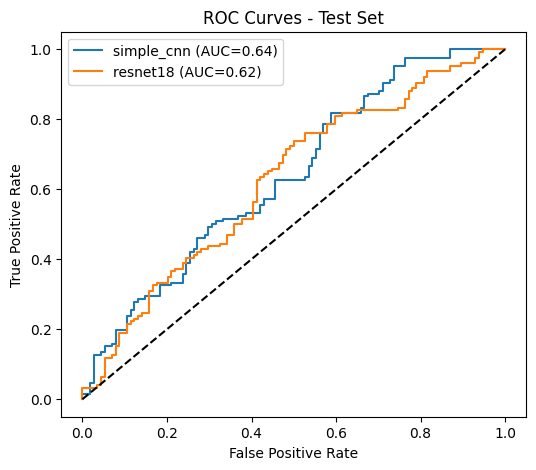

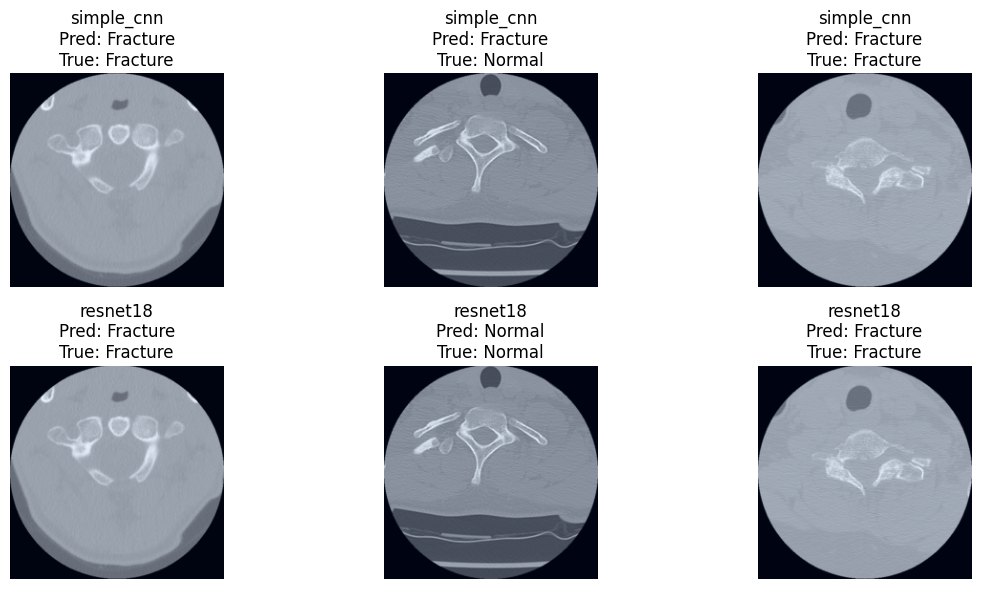

✅ Saved best model: simple_cnn_best.pth


In [6]:
# Imports
import os, random
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from torchvision.models import (resnet18, ResNet18_Weights)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# Paths & config
CSV_DIR = "/content/rsna_subset/subset_csv"
IMAGE_ROOT = "/content/rsna_png_images"

BATCH_SIZE = 16
NUM_EPOCHS = 10
LR = 1e-4
NUM_WORKERS = 0
RANDOM_SEED = 42
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

# Load CSVs
train_df = pd.read_csv(os.path.join(CSV_DIR,"train.csv"))
val_df   = pd.read_csv(os.path.join(CSV_DIR,"val.csv"))
test_df  = pd.read_csv(os.path.join(CSV_DIR,"test.csv"))

print("Train studies:", len(train_df), "Val studies:", len(val_df), "Test studies:", len(test_df))

# Dataset
class RSNADataset(Dataset):
    def __init__(self, df, image_root, transform=None, max_slices_per_study=None):
        self.items = []
        self.transform = transform
        for _, row in df.iterrows():
            uid = row["StudyInstanceUID"]
            label = int(row["patient_overall"])
            study_dir = os.path.join(image_root, uid)
            if not os.path.isdir(study_dir):
                continue
            files = sorted([f for f in os.listdir(study_dir) if f.lower().endswith('.png')])
            if len(files) == 0:
                continue
            if max_slices_per_study:
                mid = len(files)//2
                half = max_slices_per_study//2
                start = max(0, mid-half)
                chosen = files[start:start+max_slices_per_study]
            else:
                chosen = files
            for f in chosen:
                self.items.append((os.path.join(study_dir,f), label))
        random.shuffle(self.items)
    def __len__(self):
        return len(self.items)
    def __getitem__(self, idx):
        path,label = self.items[idx]
        img = Image.open(path).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, torch.tensor(label,dtype=torch.long)

# Transforms
train_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(8),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])
eval_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

MAX_SLICES_PER_STUDY = 3

train_ds = RSNADataset(train_df, IMAGE_ROOT, transform=train_transform, max_slices_per_study=MAX_SLICES_PER_STUDY)
val_ds   = RSNADataset(val_df, IMAGE_ROOT, transform=eval_transform, max_slices_per_study=MAX_SLICES_PER_STUDY)
test_ds  = RSNADataset(test_df, IMAGE_ROOT, transform=eval_transform, max_slices_per_study=MAX_SLICES_PER_STUDY)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
val_loader   = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
test_loader  = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

print("Samples -> Train:", len(train_ds), "Val:", len(val_ds), "Test:", len(test_ds))

# Models

# Simple CNN
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128*14*14, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Build model
def build_model(name):
    if name=="resnet18":
        m = resnet18(weights=ResNet18_Weights.DEFAULT)
        m.fc = nn.Linear(m.fc.in_features,2)
    elif name=="simple_cnn":
        m = SimpleCNN(num_classes=2)
    else:
        raise ValueError(name)
    return m

# Class weights
def compute_class_weights(df_list):
    all_labels = []
    for df in df_list:
        all_labels.extend(df["patient_overall"].astype(int).tolist())
    vals, counts = np.unique(all_labels, return_counts=True)
    total = sum(counts)
    weights = {k: total/(len(vals)*v) for k,v in zip(vals,counts)}
    return torch.tensor([weights.get(0,1.0), weights.get(1,1.0)], dtype=torch.float).to(DEVICE)

# Train one model
def train_one_model(model_name):
    model = build_model(model_name).to(DEVICE)
    class_weights = compute_class_weights([train_df])
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.Adam(model.parameters(), lr=LR)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2)
    history = {"train_loss":[], "val_loss":[], "train_acc":[], "val_acc":[], "val_auc":[]}
    best_auc = 0.0
    best_wts = None
    for epoch in range(NUM_EPOCHS):
        model.train()
        preds_all, labels_all = [], []
        running_loss = 0
        for imgs, labels in tqdm(train_loader, leave=False):
            imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()*imgs.size(0)
            preds_all.extend(torch.argmax(outputs,1).cpu().numpy().tolist())
            labels_all.extend(labels.cpu().numpy().tolist())
        train_loss = running_loss/len(train_loader.dataset)
        train_acc = accuracy_score(labels_all, preds_all)

        # Validation
        model.eval()
        val_preds,val_labels,val_probs=[],[],[]
        val_loss=0
        with torch.no_grad():
            for imgs, labels in val_loader:
                imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
                outputs = model(imgs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()*imgs.size(0)
                val_probs.extend(torch.softmax(outputs,1)[:,1].cpu().numpy())
                val_preds.extend(torch.argmax(outputs,1).cpu().numpy())
                val_labels.extend(labels.cpu().numpy())
        val_loss /= len(val_loader.dataset)
        val_acc = accuracy_score(val_labels, val_preds)
        val_auc = roc_auc_score(val_labels,val_probs) if len(np.unique(val_labels))>1 else 0
        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)
        history["train_acc"].append(train_acc)
        history["val_acc"].append(val_acc)
        history["val_auc"].append(val_auc)
        scheduler.step(val_auc)
        if val_auc>best_auc:
            best_auc=val_auc
            best_wts={k:v.cpu() for k,v in model.state_dict().items()}
        print(f"{model_name} Epoch {epoch+1}/{NUM_EPOCHS} - Train Acc: {train_acc*100:.2f}%, Val Acc: {val_acc*100:.2f}%, Val AUC: {val_auc:.3f}")
    if best_wts:
        model.load_state_dict(best_wts)
    return model, history

# Evaluate model
def evaluate_model(model, loader):
    model.eval()
    preds, probs, labels = [], [], []
    with torch.no_grad():
        for imgs, labs in loader:
            imgs = imgs.to(DEVICE)
            out = model(imgs)
            probs.extend(torch.softmax(out,1)[:,1].cpu().numpy())
            preds.extend(torch.argmax(out,1).cpu().numpy())
            labels.extend(labs.numpy())
    acc = accuracy_score(labels,preds)
    prec = precision_score(labels,preds, zero_division=0)
    rec = recall_score(labels,preds, zero_division=0)
    f1 = f1_score(labels,preds, zero_division=0)
    auc = roc_auc_score(labels,probs) if len(np.unique(labels))>1 else 0
    cm = confusion_matrix(labels,preds)
    fpr,tpr,_ = roc_curve(labels,probs) if len(np.unique(labels))>1 else (None,None,None)
    return {"acc":acc,"prec":prec,"rec":rec,"f1":f1,"auc":auc,"cm":cm,"fpr":fpr,"tpr":tpr}

# Model Training
model_names = ["simple_cnn", "resnet18"]
trained_models = {}
histories = {}
eval_results = {}

for name in model_names:
    print(f"\nTraining {name}")
    m, h = train_one_model(name)
    trained_models[name] = m
    histories[name] = h
    eval_results[name] = evaluate_model(m, val_loader)

# Validation AUC plot
plt.figure(figsize=(8,4))
for name,h in histories.items():
    plt.plot(h["val_auc"], label=name)
plt.xlabel("Epoch")
plt.ylabel("Validation AUC")
plt.title("Validation AUC per Epoch")
plt.legend()
plt.show()

# Validation metrics comparison
rows = []
for name,res in eval_results.items():
    rows.append({
        "model": name,
        "acc": res["acc"],
        "prec": res["prec"],
        "rec": res["rec"],
        "f1": res["f1"],
        "auc": res["auc"]
    })
res_df = pd.DataFrame(rows).sort_values("auc", ascending=False)
print(res_df.round(3))
sns.barplot(x="model", y="auc", data=res_df)
plt.title("Validation AUC Comparison")
plt.ylim(0,1)
plt.show()

# Test evaluation
test_eval_all = {}
for name, model in trained_models.items():
    print(f"\nEvaluating {name} on Test Set...")
    test_eval_all[name] = evaluate_model(model, test_loader)

# Test metrics comparison
rows = []
for name,res in test_eval_all.items():
    rows.append({
        "model": name,
        "acc": res["acc"],
        "prec": res["prec"],
        "rec": res["rec"],
        "f1": res["f1"],
        "auc": res["auc"]
    })
test_df = pd.DataFrame(rows).sort_values("auc", ascending=False)
print("\nTest Set Performance:")
print(test_df.round(3))

# Confusion matrices
fig, axes = plt.subplots(1,len(test_eval_all), figsize=(5*len(test_eval_all),4))
for i,(model_name,res) in enumerate(test_eval_all.items()):
    ax = axes[i] if len(test_eval_all)>1 else axes
    sns.heatmap(res["cm"], annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"{model_name}\nAcc: {res['acc']*100:.1f}%, AUC: {res['auc']:.2f}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC curves
plt.figure(figsize=(6,5))
for name,res in test_eval_all.items():
    if res.get("fpr") is not None and res.get("tpr") is not None:
        plt.plot(res["fpr"], res["tpr"], label=f"{name} (AUC={res['auc']:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curves - Test Set")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Show sample predictions from all models
def show_samples_all(models_dict, dataset, n_samples=3):
    plt.figure(figsize=(12, len(models_dict)*3))
    for idx, (model_name, model) in enumerate(models_dict.items()):
        model.eval()
        shown = 0
        for i in range(len(dataset)):
            img, label = dataset[i]
            with torch.no_grad():
                out = model(img.unsqueeze(0).to(DEVICE))
                pred = torch.argmax(out,1).item()
            if shown < n_samples:
                ax = plt.subplot(len(models_dict), n_samples, idx*n_samples + shown + 1)
                img_np = img.permute(1,2,0).cpu().numpy()
                img_np = (img_np - img_np.min()) / (img_np.max()-img_np.min() + 1e-8)
                ax.imshow(img_np)
                ax.set_title(f"{model_name}\nPred: {'Fracture' if pred==1 else 'Normal'}\nTrue: {'Fracture' if label==1 else 'Normal'}")
                ax.axis("off")
                shown += 1
            if shown >= n_samples:
                break
    plt.tight_layout()
    plt.show()

show_samples_all(trained_models, test_ds)
